# 6
## 6.1
## 6.2

In [1]:
library(readr)

In [2]:
library(pipeR)

In [3]:
d <- readr::read_csv("data/chap06/data4a.csv")
str(d)

Parsed with column specification:
cols(
  N = col_integer(),
  y = col_integer(),
  x = col_double(),
  f = col_character()
)


Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  4 variables:
 $ N: int  8 8 8 8 8 8 8 8 8 8 ...
 $ y: int  1 6 5 6 1 1 3 6 0 8 ...
 $ x: num  9.76 10.48 10.83 10.94 9.37 ...
 $ f: chr  "C" "C" "C" "C" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ N: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ y: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ x: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ f: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [5]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
d %>>% mutate(f = as.factor(f)) -> d
summary(d)

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

In [7]:
library(ggplot2)
library(tidyr)

In [10]:
options(repr.plot.width = 4, repr.plot.height = 4)

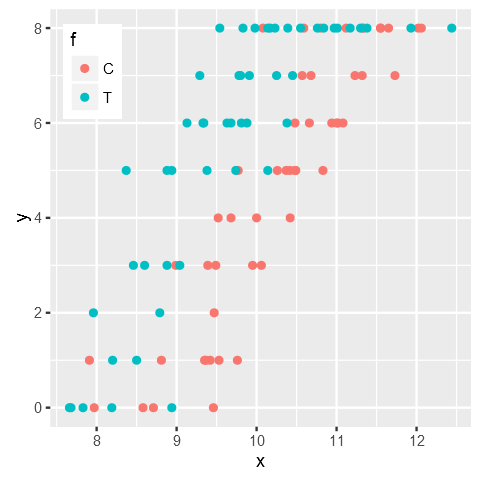

In [13]:
d %>>% ggplot(aes(x = x, y = y, group = f, colour = f)) + 
    geom_point() + 
    theme(
        legend.position = c(.1, .85)
    )

## 6.3

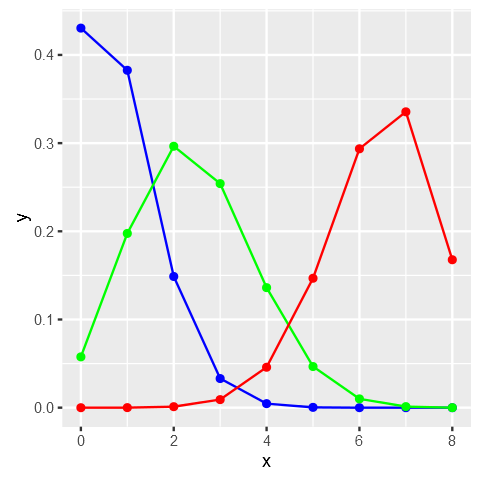

In [19]:
ggplot(data_frame(x = c(0:8)), aes(x)) + 
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.1), colour = "blue") +
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.1), colour = "blue") +
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.3), colour = "green") + 
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.3), colour = "green") + 
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.8), colour = "red") + 
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.8), colour = "red")

## 6.4
### 6.4.1

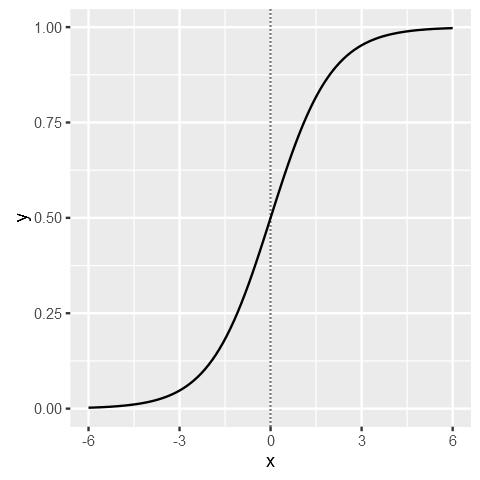

In [22]:
ggplot(data_frame(x = c(-6:6)), aes(x)) + 
    stat_function(geom = "line", fun = function(z){1 / (1 + exp(-z))}) + 
    geom_vline(xintercept = 0, linetype = "dotted")

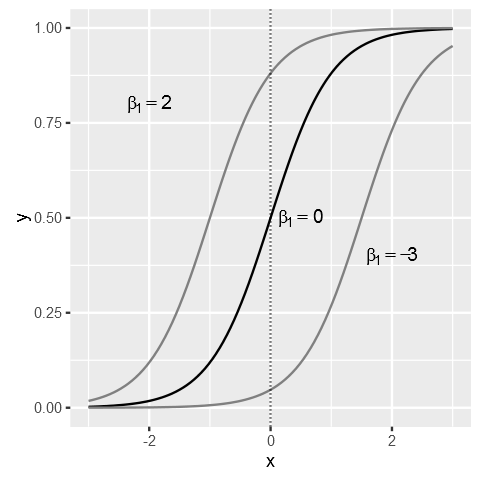

In [56]:
logistic <- function(x, beta1, beta2){1 / (1 + exp(-(beta1 + beta2 * x)))}
ggplot(data_frame(x = c(-3:3)), aes(x)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 2)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 2, beta2 = 2), colour = gray(0.5)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = -3, beta2 = 2), colour = gray(0.5)) + 
    geom_vline(xintercept = 0, linetype = "dotted") + 
    annotate(geom = "text", label = "beta[1]==0", x = 0.5, y = 0.5, parse = TRUE) + 
    annotate(geom = "text", label = "beta[1]==2", x = -2, y = 0.8, parse = TRUE) + 
    annotate(geom = "text", label = "beta[1]==-3", x = 2, y = 0.4, parse = TRUE)

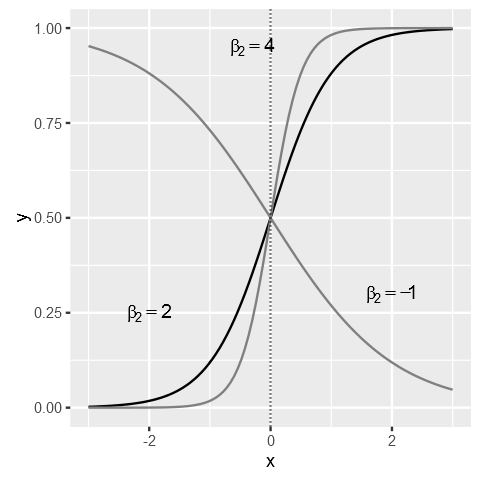

In [55]:
ggplot(data_frame(x = c(-3:3)), aes(x)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 2)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 4), colour = gray(0.5)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = -1), colour = gray(0.5)) + 
    geom_vline(xintercept = 0, linetype = "dotted") + 
    annotate(geom = "text", label = "beta[2]==2", x = -2, y = 0.25, parse = TRUE) + 
    annotate(geom = "text", label = "beta[2]==4", x = -0.3, y = 0.95, parse = TRUE) + 
    annotate(geom = "text", label = "beta[2]==-1", x = 2, y = 0.3, parse = TRUE)

### 6.4.2